In [2]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.datasets import load_svmlight_file
from method import SGD,SPS,SPSlack

import sys
import math
import seaborn as sns
import random
from tqdm import tqdm
%config InlineBackend.figure_format = 'svg'

markers = ["v","^","<",">","o","s","p","P","*"]
colors = sns.color_palette("colorblind")
!wget https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a1a

/bin/bash: wget: command not found


In [2]:
from joblib import Memory
from sklearn.datasets import load_svmlight_file
mem=Memory("./mecache")
def get_data(filePath):
    data = load_svmlight_file(filePath)
    return data[0], data[1]

A, y = get_data("a1a")
lambd=0.01
A = A.todense()
A = np.array(A)

n = A.shape[0]
d = A.shape[1]
print(A.shape,y.shape)

#initialization
np.random.seed(10)
x0=0.1*np.random.randn(d,) #starting position
s0=0.1
def cost(x, random_ind):
    batch_size = len(random_ind)
    f = np.sum(np.log(1+np.exp(-np.dot(A[random_ind], x) * y[random_ind])))/(2*batch_size)
    return f

def grad(x, random_ind):
    batch_size = len(random_ind)
    num = -y[random_ind]
    den = (1 + np.exp(np.dot(A[random_ind], x) * y[random_ind]))
    c = num/den
    c2 = np.dot(c.T,A[random_ind])
    final_grad = (c2)/(2*batch_size) 
    return final_grad

def hess(x):
    hess_res = lambd*np.identity(d)
    for i in range(n):
        update_hess = (0.5/n) * (y[i]**2) * (np.exp(y[i]*np.dot(A[i],x))) * np.outer(A[i],A[i]) / (1+np.exp(y[i]*np.dot(A[i],x)))**2
        hess_res = hess_res + update_hess
    eigs,_ = la.eig(hess_res)
    return np.min(eigs),np.max(eigs)
    
f0=cost(x0,range(n))

(1605, 119)


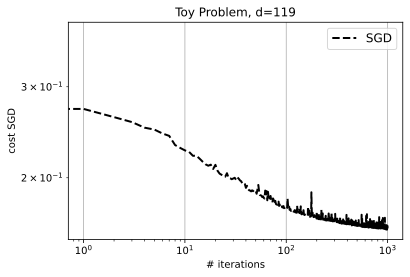

In [6]:
from method import SGD
#full batch
batch_size = 50
K = 1000 #number of iterations
gamma = 1
_,ff_star,_ = SGD(cost, grad, hess, K, gamma, x0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SGD')
plt.loglog(ff_star,'--',color = 'k',linewidth=2,label = 'SGD', markevery=2000)
plt.legend(fontsize=12)
plt.title(r"Toy Problem, d="+ str(d))
ax.grid()

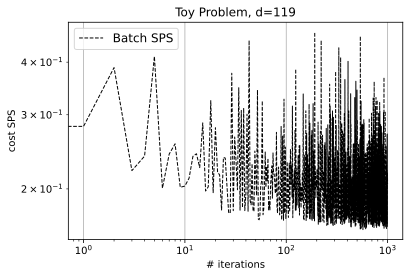

In [7]:
from method import SPS
c=1
gamma_max = 10
batch_size = 50
K = 1000 #number of iterations
gamma = 1
_,ff_star,_= SPS(cost, grad, hess, K, c, gamma_max, x0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPS')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPS', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Toy Problem, d="+ str(d))
ax.grid()

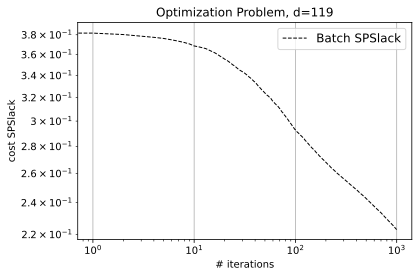

In [8]:
from method import SPSlack
gamma_max = 0.01
batch_size = 50
K = 1000 #number of iterations
_,ff_star,_= SPSlack(cost, grad,hess, K, gamma_max , x0,s0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPSlack')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPSlack', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Optimization Problem, d="+ str(d))
ax.grid()

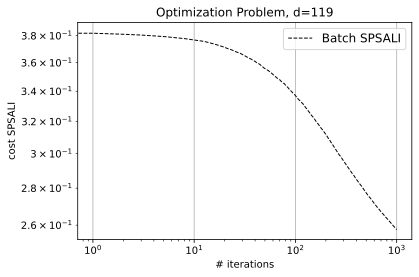

In [9]:
from method import SPSALI
gamma_max = 0.01
batch_size = 50
K = 1000 #number of iterations
_,ff_star,_= SPSALI(cost, grad,hess, K, gamma_max , x0,s0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPSALI')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPSALI', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Optimization Problem, d="+ str(d))
ax.grid()

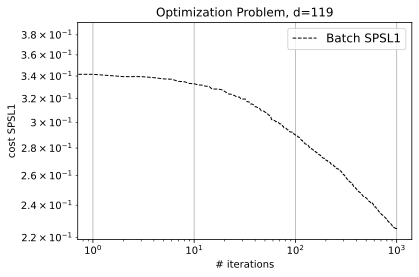

In [10]:
from method import SPSL1
gamma_max = 0.01
batch_size = 50
K = 1000 #number of iterations
_,ff_star,_= SPSL1(cost, grad,hess, K, gamma_max , x0,s0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPSL1')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPSL1', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Optimization Problem, d="+ str(d))
ax.grid()

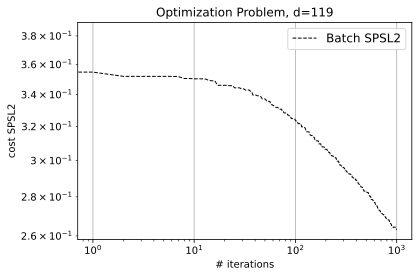

In [11]:
from method import SPSL2
gamma_max = 0.01
batch_size = 50
K = 1000 #number of iterations
_,ff_star,_= SPSL2(cost, grad,hess, K, gamma_max , x0,s0, batch_size, n)
f_sol = ff_star[-1]

#plotting angles
fig, ax = plt.subplots()
plt.xlabel('# iterations')
plt.ylabel('cost SPSL2')
plt.loglog(ff_star,'--',color = 'k',linewidth=1,label = 'Batch SPSL2', markevery=2000)
plt.legend(fontsize=12)#字体大小
plt.title(r"Optimization Problem, d="+ str(d))
ax.grid()